# Custom sorting of plot series

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

elem = pd.read_csv("../examples/data/elements.csv")

%matplotlib inline

C:\Users\cdtfr\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


When presenting data it is not uncommon to want custom sorting of the plot series, but its not always clear on how to do this within plotnine. 

By default plotnine (and ggplot) will order alphabetically. 

A common use case is to order a horizontal bar by the count, lets explore below. 

In [7]:
elem["bonding type"].value_counts()

metallic            80
covalent network     8
atomic               7
diatomic             3
Name: bonding type, dtype: int64

The desired order for this plot would be as it as above, but instead the default order is shown below (ordered alphabetically).

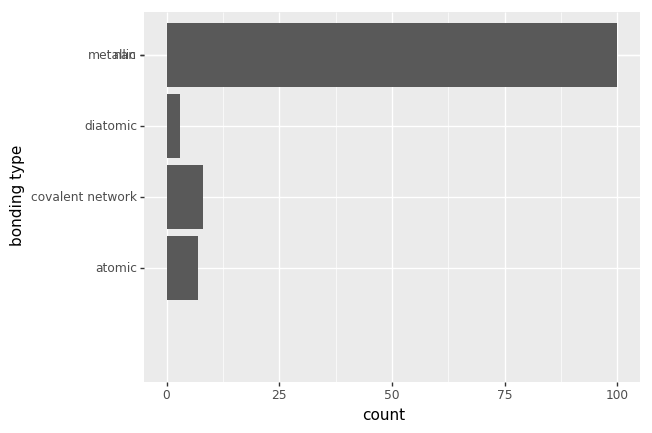

<ggplot: (-9223371862125142128)>

In [8]:
(ggplot(elem, aes(x="bonding type"))
    + geom_bar()
    + coord_flip()
)

Plotnine respects the ordered catagorical feature of pandas when plotting data into plots. 

https://pandas.pydata.org/pandas-docs/stable/categorical.html

To do this you should;
1. Construct a list of current values
2. Assign an order for these values
3. Create an Categorical object (needs to have ordered=True)
4. Cast the column of interest as your newly created ordered Categorical object.
5. Create your plot using this categorised data.

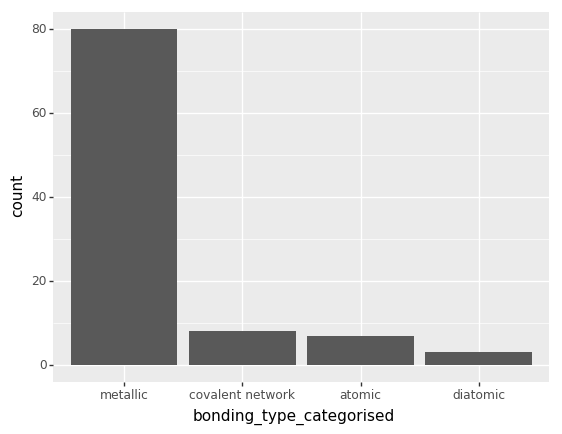

<ggplot: (-9223371862125006241)>

In [11]:
# Create a list of models with the number of counts of each
bonding_type_counts = elem["bonding type"].value_counts()

# Create a list of current values from the index
bonding_types_list = list(bonding_type_counts.index.values)

# Create the category
bonding_type_cats = pd.Categorical(elem["bonding type"],
                                   categories=bonding_types_list,
                                   ordered=True)

# Cast the existing data into the category we just setup
#   use a new series for the sake of demonstration
elem["bonding_type_categorised"] = elem["bonding type"].astype(bonding_type_cats)

# Finally plot the data
#   we need to remove NA values otherwise they get included in the last category (diatomic)
(ggplot(elem[elem["bonding_type_categorised"].notna()], aes(x="bonding_type_categorised"))
     + geom_bar()
)